# Life Expectancy (WHO) Dataset Test

This notebook tests the download and loading of the WHO Life Expectancy dataset from Kaggle.

In [1]:
# Install required packages
!pip install kagglehub pandas matplotlib seaborn

In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Download the dataset to current directory
print("Downloading WHO Life Expectancy dataset...")
cache_path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

# Copy to current folder
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

# Copy files from cache to local directory
for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to local data folder")

path = local_data_dir
print(f"Dataset available locally at: {path}")

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 119k/119k [00:00<00:00, 128kB/s]

Extracting files...
Copied Life Expectancy Data.csv to local data folder
Dataset available locally at: /home/tamim/ai4ph/data/life_expectancy_who


In [3]:
# Load and explore the data
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nFirst 5 rows:\n{df.head()}")
    print(f"\nCountries: {df['Country'].nunique() if 'Country' in df.columns else 'N/A'}")
    print(f"Years: {df['Year'].min() if 'Year' in df.columns else 'N/A'} - {df['Year'].max() if 'Year' in df.columns else 'N/A'}")
    
    # Check for missing values
    missing = df.isnull().sum()
    print(f"\nMissing values:\n{missing[missing > 0].head()}")

Dataset shape: (2938, 22)

Columns: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

First 5 rows:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1   

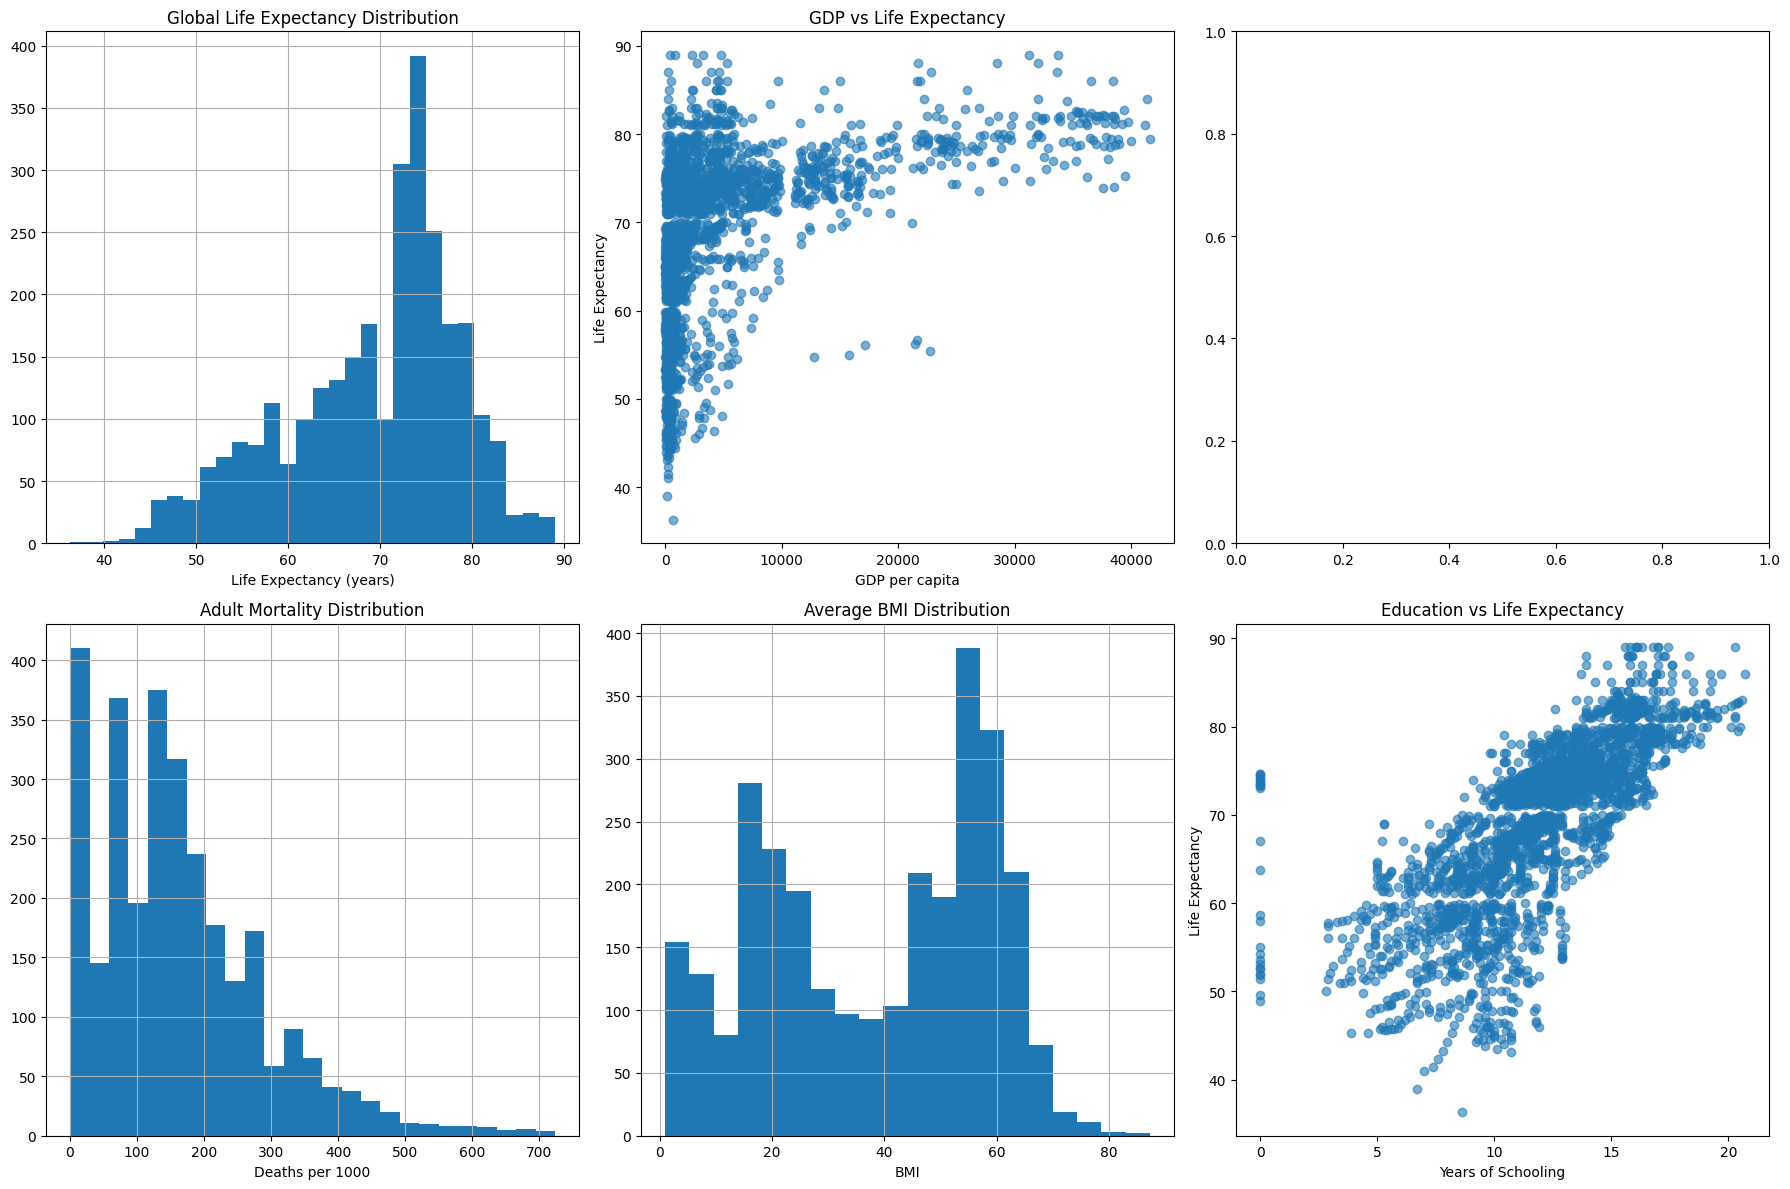

In [4]:
# Create WHO health indicator visualizations
if csv_files and len(df) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    # Life expectancy distribution
    if 'Life expectancy ' in df.columns:
        df['Life expectancy '].hist(bins=30, ax=axes[0])
        axes[0].set_title('Global Life Expectancy Distribution')
        axes[0].set_xlabel('Life Expectancy (years)')
    
    # GDP vs Life Expectancy
    if 'GDP' in df.columns and 'Life expectancy ' in df.columns:
        # Remove outliers for better visualization
        gdp_clean = df[df['GDP'] < df['GDP'].quantile(0.95)]
        axes[1].scatter(gdp_clean['GDP'], gdp_clean['Life expectancy '], alpha=0.6)
        axes[1].set_title('GDP vs Life Expectancy')
        axes[1].set_xlabel('GDP per capita')
        axes[1].set_ylabel('Life Expectancy')
    
    # Immunization coverage
    immunization_cols = [col for col in df.columns if 'immunization' in col.lower() or 'vaccination' in col.lower()]
    if immunization_cols:
        df[immunization_cols[0]].hist(bins=20, ax=axes[2])
        axes[2].set_title(f'{immunization_cols[0]} Distribution')
    
    # Adult mortality trends
    if 'Adult Mortality' in df.columns:
        df['Adult Mortality'].hist(bins=25, ax=axes[3])
        axes[3].set_title('Adult Mortality Distribution')
        axes[3].set_xlabel('Deaths per 1000')
    
    # BMI distribution
    if ' BMI ' in df.columns:
        df[' BMI '].hist(bins=20, ax=axes[4])
        axes[4].set_title('Average BMI Distribution')
        axes[4].set_xlabel('BMI')
    
    # Schooling vs Life Expectancy
    if 'Schooling' in df.columns and 'Life expectancy ' in df.columns:
        axes[5].scatter(df['Schooling'], df['Life expectancy '], alpha=0.6)
        axes[5].set_title('Education vs Life Expectancy')
        axes[5].set_xlabel('Years of Schooling')
        axes[5].set_ylabel('Life Expectancy')
    
    plt.tight_layout()
    plt.show()

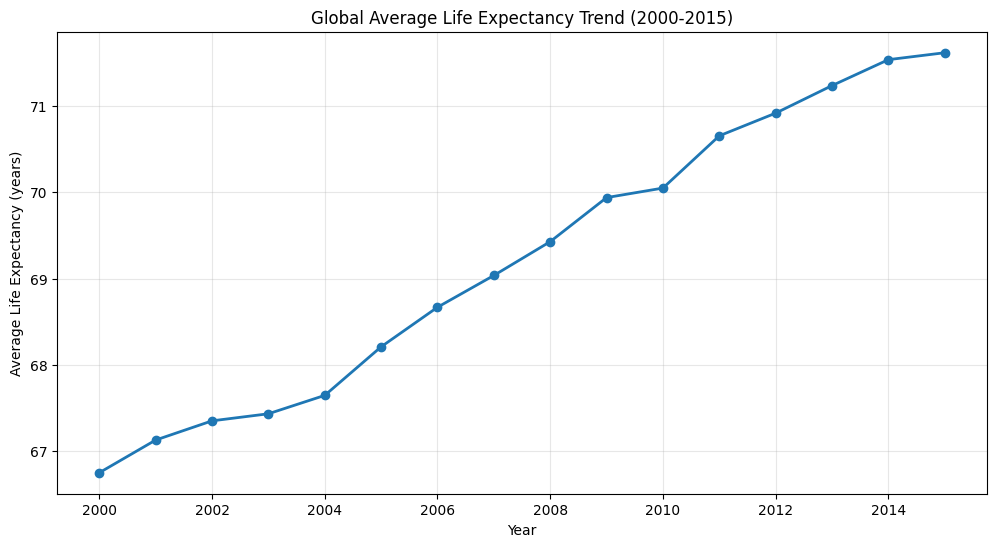

Life expectancy change: 4.87 years over 15 years


In [5]:
# Time series analysis
if csv_files and 'Year' in df.columns and 'Life expectancy ' in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Global average life expectancy trend
    yearly_avg = df.groupby('Year')['Life expectancy '].mean()
    plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2)
    plt.title('Global Average Life Expectancy Trend (2000-2015)')
    plt.xlabel('Year')
    plt.ylabel('Average Life Expectancy (years)')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Life expectancy change: {yearly_avg.iloc[-1] - yearly_avg.iloc[0]:.2f} years over {yearly_avg.index[-1] - yearly_avg.index[0]} years")

In [6]:
print("✅ Dataset download and analysis completed successfully!")
print("\nDataset Summary:")
print(f"- Location: {path}")
if csv_files:
    print(f"- Records: {df.shape[0]:,}")
    print(f"- Features: {df.shape[1]}")
    if 'Country' in df.columns:
        print(f"- Countries: {df['Country'].nunique()}")
    if 'Year' in df.columns:
        print(f"- Time period: {df['Year'].min()}-{df['Year'].max()}")
print("- Use case: Life expectancy analysis, global health trends, WHO indicators")
print("- Perfect for: Module 4 (Data Visualization), Module 7 (Public Health Modeling), Module 8 (Surveillance)")

✅ Dataset download and analysis completed successfully!

Dataset Summary:
- Location: /home/tamim/ai4ph/data/life_expectancy_who
- Records: 2,938
- Features: 22
- Countries: 193
- Time period: 2000-2015
- Use case: Life expectancy analysis, global health trends, WHO indicators
- Perfect for: Module 4 (Data Visualization), Module 7 (Public Health Modeling), Module 8 (Surveillance)
